Conjunto de datos:

Contiene información sobre la calidad del aire. URL:
https://www.kaggle.com/datasets/epa/epa-historical-air-quality

Ejercicio

      1) Realizar un análisis exploratorio al conjunto de datos entregado, para ello debe crear diferentes preguntas e hipótesis a resolver en los datos partiendo de un problema que cada grupo debe plantear.
      2) Después de realizar el análisis exploratorio, debe hacer el preprocesamiento de los datos según como considere: limpieza, transformación, reducción de datos o discretización de los datos. Para esto, puede usar pandas1.
      3) Debe realizar un dashboard en PowerBI o Tableau para exponer visualmente las conclusiones del análisis exploratorio.
      4)Luego de hacer el preprocesamiento y tener el conjunto de datos final, debe crear un modelo de Machine Learning de regresión lineal. Este modelo puede ser de predicción o regresión logística para clasificación. Debe buscar a forma de evaluar si el modelo está bien o no.

# Entregables

     • Análisis exploratorio en notebook (1 punto).
     • Preprocesamiento de los datos (1.5 puntos).
     • Visualización de datos con PowerBI o Tableau (1.5 puntos).
     • Modelo de Machine Learning y evaluación del modelo (1 punto)

# Results

In [48]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Import DataSet
dataSet = pd.read_csv("air_quality_health_impact_data.csv")
dataSet.head()
# Viewing DataSet Structure
air_quality = pd.DataFrame(dataSet)


#### DataSet Columns:

    RecordID: Row Identificator
    AQI: Air Quality Index: a measure of how polluted the air currently is or how polluted it is forecast to become.
    PM10: Concentration of particulate matter less than 10 micrometers in diameter (μg/m³).
    PM2_5: Concentration of particulate matter less than 2.5 micrometers in diameter (μg/m³).
    NO2: Concentration of nitrogen dioxide (ppb).
    SO2: Concentration of sulfur dioxide (ppb).
    O3: Concentration of ozone (ppb).
    Temperature: Temperature in degrees Celsius (°C).
    Humidity: Humidity percentage (%).
    WindSpeed: Wind speed in meters per second (m/s).
    RespiratoryCases: Number of respiratory cases reported.
    CardiovascularCases: Number of cardiovascular cases reported.
    HospitalAdmissions: Number of hospital admissions reported.
    HealthImpactScore: A score indicating the overall health impact based on air quality and other related factors, ranging from 0 to 100.
    HealthImpactClass: Classification of the health impact based on the health impact.


The DataSet have 5811 rows

In [50]:
#Number rows of DataSet
air_quality.tail()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
5806,5807,171.112762,11.246387,197.984628,158.643107,17.743678,280.370909,37.359323,61.707640,4.097129,14,5,2,100.000000,4.0
5807,5808,490.691667,275.340762,55.774170,132.336871,29.334724,108.043492,34.532542,21.528555,6.682549,8,6,2,100.000000,3.0
5808,5809,314.841798,41.892699,184.708551,82.105823,68.334578,105.568503,22.975564,92.725625,2.889698,12,2,3,100.000000,1.0
5809,5810,208.080473,165.533785,199.177255,100.796385,87.586488,166.469537,36.090620,25.836286,10.722393,6,2,3,100.000000,4.0
5810,5811,83.269257,82.216262,119.968244,193.440691,79.849177,28.681885,18.239090,77.096194,16.410320,14,2,2,81.668298,0.0


In [51]:
#DataSet Number of rows and columns
air_quality.shape

(5811, 15)

In [52]:
# General info of DataFrame
# Types of variables
# All values ​​are numerical 
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [53]:
# No exists duplicated values
print([x for x in air_quality.duplicated() if x == True] , '\n\n')
air_quality.duplicated().sum()

[] 




np.int64(0)

In [54]:
air_quality[air_quality.duplicated()]

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass


In [55]:
# All values ​​are numerical 
air_quality.isna().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [56]:
# Non Unique values
air_quality.nunique()

RecordID               5811
AQI                    5811
PM10                   5811
PM2_5                  5811
NO2                    5811
SO2                    5811
O3                     5811
Temperature            5811
Humidity               5811
WindSpeed              5811
RespiratoryCases         23
CardiovascularCases      15
HospitalAdmissions       10
HealthImpactScore      1528
HealthImpactClass         5
dtype: int64

In [57]:
air_quality.isnull().mean() * 100 
air_quality.duplicated().value_counts()

False    5811
Name: count, dtype: int64

### Problem
        How does air quality affect the incidence of respiratory and cardiovascular diseases in the population?

### Questions and Hypothesis

        What is the relationship between the Air Quality Index (AQI) and the number of respiratory cases reported?
        Which pollutant has the greatest impact on cases of respiratory and cardiovascular diseases?
        How do meteorological conditions (temperature, humidity, wind speed) affect the incidence of respiratory and cardiovascular diseases?

        As the AQI increases, the number of cases of respiratory diseases increases.
        PM2.5 (fine particles) has a more significant impact on respiratory cases, while NO2 has more influence on cardiovascular diseases.
        High temperatures and low humidity increase cases of respiratory diseases, due to the higher concentration of pollutants in the air.

    

In [ ]:

#¿Cuál es la relación entre el Índice de Calidad del Aire (AQI) y la cantidad de casos respiratorios reportados?
#¿Qué contaminante tiene el mayor impacto en los casos de enfermedades respiratorias y cardiovasculares?
#¿Cómo afectan las condiciones meteorológicas (temperatura, humedad, velocidad del viento) a la incidencia de enfermedades respiratorias y cardiovasculares?

#A medida que aumenta el AQI, se incrementa el número de casos de enfermedades respiratorias.
#El PM2.5 (partículas finas) tiene un impacto más significativo en los casos respiratorios, mientras que el NO2 influye más en las enfermedades cardiovasculares.
#Altas temperaturas y baja humedad incrementan los casos de enfermedades respiratorias, debido a la mayor concentración de contaminantes en el aire.

## Data processing

In [58]:
# Not exists null values
print(air_quality.isnull().all())
print(air_quality.isnull().all(axis = 1))

RecordID               False
AQI                    False
PM10                   False
PM2_5                  False
NO2                    False
SO2                    False
O3                     False
Temperature            False
Humidity               False
WindSpeed              False
RespiratoryCases       False
CardiovascularCases    False
HospitalAdmissions     False
HealthImpactScore      False
HealthImpactClass      False
dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
5806    False
5807    False
5808    False
5809    False
5810    False
Length: 5811, dtype: bool


In [59]:
print(air_quality['AQI'].mean())
print(air_quality['AQI'].median())
print(air_quality['AQI'].mode()[0])

248.4384763401845
249.12784113172685
0.0058173776830705


In [60]:
air_quality.boxplot(column=["AQI"])

<Axes: >

In [61]:
air_quality.boxplot(column=["Temperature"])

<Axes: >

In [62]:
air_quality.isnull().mean()*100

RecordID               0.0
AQI                    0.0
PM10                   0.0
PM2_5                  0.0
NO2                    0.0
SO2                    0.0
O3                     0.0
Temperature            0.0
Humidity               0.0
WindSpeed              0.0
RespiratoryCases       0.0
CardiovascularCases    0.0
HospitalAdmissions     0.0
HealthImpactScore      0.0
HealthImpactClass      0.0
dtype: float64

In [63]:
#Rounded colums
air_quality['AQI'] = air_quality['AQI'].round(2)
air_quality['PM10'] = air_quality['PM10'].round(2)
air_quality['PM2_5'] = air_quality['PM2_5'].round(2)
air_quality['NO2'] = air_quality['NO2'].round(2)
air_quality['SO2'] = air_quality['SO2'].round(2)
air_quality['O3'] = air_quality['O3'].round(2)
air_quality['Temperature'] = air_quality['Temperature'].round(2)
air_quality['Humidity'] = air_quality['Humidity'].round(2)
air_quality['WindSpeed'] = air_quality['WindSpeed'].round(2)
air_quality['HealthImpactScore'] = air_quality['HealthImpactScore'].round(2)

In [64]:
#Drop columns
air_quality = air_quality.drop(columns=['RecordID'])

In [65]:
print(air_quality['Temperature'].min())
print(air_quality['Temperature'].max())

-9.99
39.96


In [66]:
print(air_quality['AQI'].min())
print(air_quality['AQI'].max())
print(air_quality['HealthImpactScore'].min())
print(air_quality['HealthImpactScore'].max())

0.01
499.86
22.45
100.0


In [67]:
air_quality

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,187.27,295.85,13.04,6.64,66.16,54.62,5.15,84.42,6.14,7,5,1,97.24,0.0
1,475.36,246.25,9.98,16.32,90.50,169.62,1.54,46.85,4.52,10,2,0,100.00,0.0
2,366.00,84.44,23.11,96.32,17.88,9.01,1.17,17.81,11.16,13,3,0,100.00,0.0
3,299.33,21.02,14.27,81.23,48.32,93.16,21.93,99.47,15.30,8,8,1,100.00,0.0
4,78.01,16.99,152.11,121.24,90.87,241.80,9.22,24.91,14.53,9,0,1,95.18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,171.11,11.25,197.98,158.64,17.74,280.37,37.36,61.71,4.10,14,5,2,100.00,4.0
5807,490.69,275.34,55.77,132.34,29.33,108.04,34.53,21.53,6.68,8,6,2,100.00,3.0
5808,314.84,41.89,184.71,82.11,68.33,105.57,22.98,92.73,2.89,12,2,3,100.00,1.0
5809,208.08,165.53,199.18,100.80,87.59,166.47,36.09,25.84,10.72,6,2,3,100.00,4.0


In [101]:
#Normalize
df_cleaned = air_quality.copy()

scaler = MinMaxScaler()
continuous_columns = ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 
                      'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 
                      'HospitalAdmissions', 'HealthImpactScore']

df_cleaned[continuous_columns] = scaler.fit_transform(df_cleaned[continuous_columns])


In [102]:
df_cleaned


,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
3,0.598413,0.069244,0.071218,0.406263,0.483342,0.310616,0.980609,0.994324,0.7650,0.285714,0.571429,0.142857,1.000000,0.0
4,0.154859,0.055789,0.760590,0.606393,0.909055,0.806215,0.100416,0.164496,0.7265,0.333333,0.000000,0.142857,0.936134,0.0
9,0.708059,0.843349,0.910828,0.896809,0.445323,0.393305,0.122576,0.600668,0.7125,0.523810,0.357143,0.142857,1.000000,0.0
18,0.431349,0.534722,0.986297,0.156713,0.462031,0.002167,0.807479,0.340790,0.4560,0.238095,0.214286,0.142857,1.000000,0.0
21,0.138305,0.816440,0.727332,0.318577,0.118059,0.117798,0.851801,0.269338,0.0785,0.333333,0.357143,0.000000,0.786803,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,0.298555,0.238448,0.295474,0.370148,0.107754,0.361330,0.042244,0.909850,0.1245,0.428571,0.571429,0.000000,0.763350,4.0
5801,0.098884,0.205896,0.975894,0.804172,0.206803,0.667078,0.583102,0.952365,0.3685,0.238095,0.357143,0.000000,0.949516,0.0
5804,0.377618,0.786091,0.147537,0.721539,0.625613,0.510970,0.709141,0.358709,0.7515,0.333333,0.214286,0.142857,1.000000,3.0
5805,0.087099,0.320947,0.026207,0.433473,0.039520,0.944152,0.292936,0.267001,0.6205,0.523810,0.285714,0.142857,0.468928,1.0


In [103]:
print(df_cleaned['HealthImpactScore'].min())
print(df_cleaned['HealthImpactScore'].max())

0.0
1.0


In [104]:
#Discretization columns
df_cleaned['AQI_Category'] = pd.cut(df_cleaned['AQI'], bins=[-1, 0.2, 0.3, 0.4, 0.5, 1], 
                                    labels=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy'])

df_cleaned['HealthImpactLevel'] = pd.cut(df_cleaned['HealthImpactScore'], bins=[0, 0.5, 0.9, 1.5], 
                                         labels=['Low', 'Medium', 'High'])

In [105]:
df_cleaned

,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass,AQI_Category,HealthImpactLevel
3,0.598413,0.069244,0.071218,0.406263,0.483342,0.310616,0.980609,0.994324,0.7650,0.285714,0.571429,0.142857,1.000000,0.0,Very Unhealthy,High
4,0.154859,0.055789,0.760590,0.606393,0.909055,0.806215,0.100416,0.164496,0.7265,0.333333,0.000000,0.142857,0.936134,0.0,Good,High
9,0.708059,0.843349,0.910828,0.896809,0.445323,0.393305,0.122576,0.600668,0.7125,0.523810,0.357143,0.142857,1.000000,0.0,Very Unhealthy,High
18,0.431349,0.534722,0.986297,0.156713,0.462031,0.002167,0.807479,0.340790,0.4560,0.238095,0.214286,0.142857,1.000000,0.0,Unhealthy,High
21,0.138305,0.816440,0.727332,0.318577,0.118059,0.117798,0.851801,0.269338,0.0785,0.333333,0.357143,0.000000,0.786803,0.0,Good,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,0.298555,0.238448,0.295474,0.370148,0.107754,0.361330,0.042244,0.909850,0.1245,0.428571,0.571429,0.000000,0.763350,4.0,Moderate,Medium
5801,0.098884,0.205896,0.975894,0.804172,0.206803,0.667078,0.583102,0.952365,0.3685,0.238095,0.357143,0.000000,0.949516,0.0,Good,High
5804,0.377618,0.786091,0.147537,0.721539,0.625613,0.510970,0.709141,0.358709,0.7515,0.333333,0.214286,0.142857,1.000000,3.0,Unhealthy for Sensitive Groups,High
5805,0.087099,0.320947,0.026207,0.433473,0.039520,0.944152,0.292936,0.267001,0.6205,0.523810,0.285714,0.142857,0.468928,1.0,Good,Low


In [87]:
def calculate_outlier(col, constant):
    mean = air_quality[col].mean()
    dev_std = air_quality[col].std()
    
    lim_sup = mean + (dev_std * constant)
    lim_inf = mean - (dev_std * constant)
    
    print("calculating the limits for: ", col)
    print(f"lim_sup: {lim_sup}")
    print(f"lim_inf: {lim_inf}")
    print(f"mean: {mean}")
    print(f"max: {air_quality[col].max()}")
    print(f"min: {air_quality[col].min()}")
    
    print("Total outliers in sup: ", air_quality[air_quality[col] > lim_sup].shape[0])
    print("Total outliers in inf: ", air_quality[air_quality[col] < lim_inf].shape[0])
    
    air_quality.boxplot(column=[col])
    plt.show()
    
    plt.hist(air_quality[col])
    plt.show()
    print("\n")
    
    return lim_inf, lim_sup

calculating the limits for:  Temperature
lim_sup: 17.22259332558231
lim_inf: 13.052353039137596
mean: 15.137473182359953
max: 22.21
min: 7.77
Total outliers in sup:  600
Total outliers in inf:  592


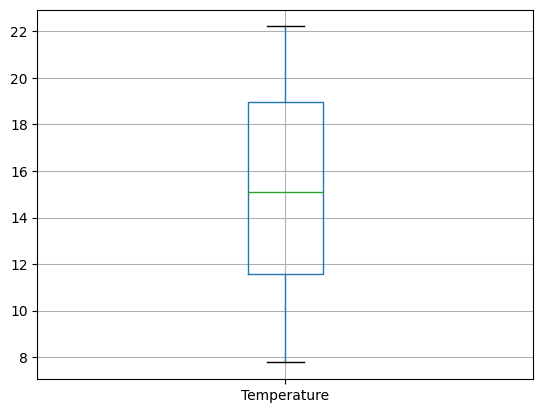

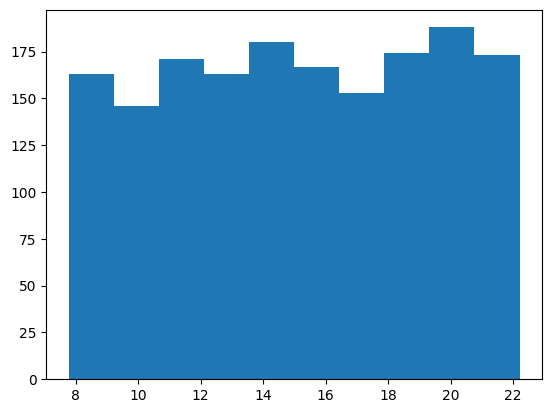

In [99]:
lim_inf, lim_sup = calculate_outlier("Temperature", 0.5)

air_quality = air_quality[(air_quality["Temperature"] >= lim_inf) & (air_quality["Temperature"] <= lim_sup)]

calculating the limits for:  Humidity
lim_sup: 132.8943474236458
lim_inf: -24.204073287769752
mean: 54.34513706793802
max: 99.98
min: 10.13
Total outliers in sup:  0
Total outliers in inf:  0


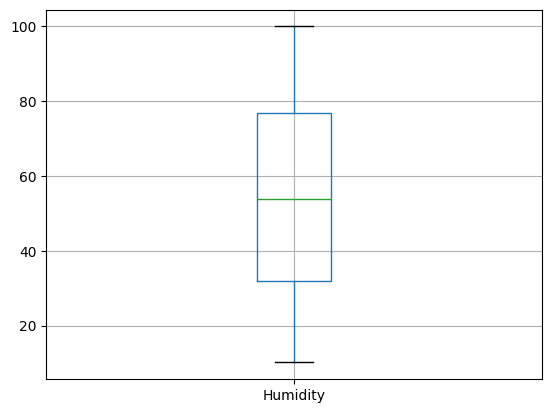

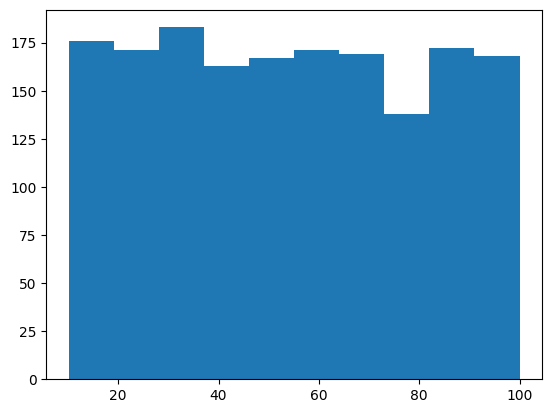

In [93]:
lim_inf, lim_sup = calculate_outlier("Humidity", 3)

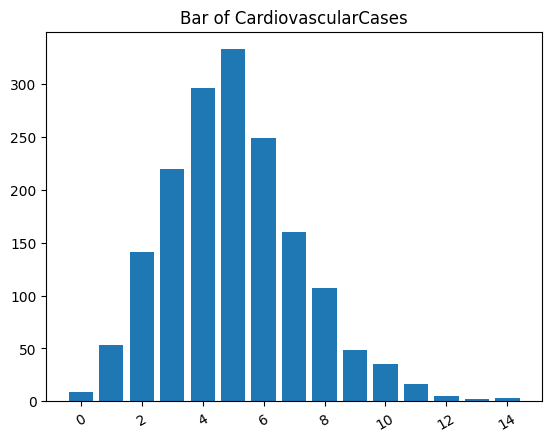

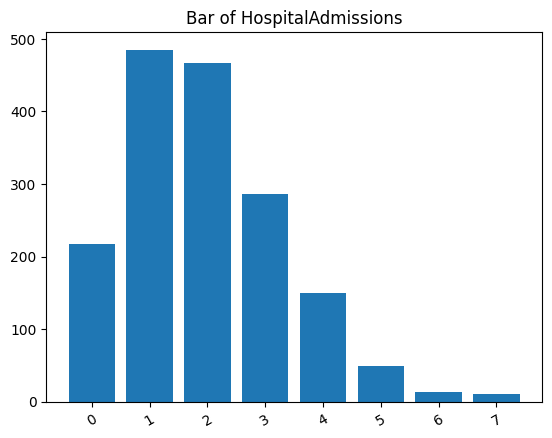

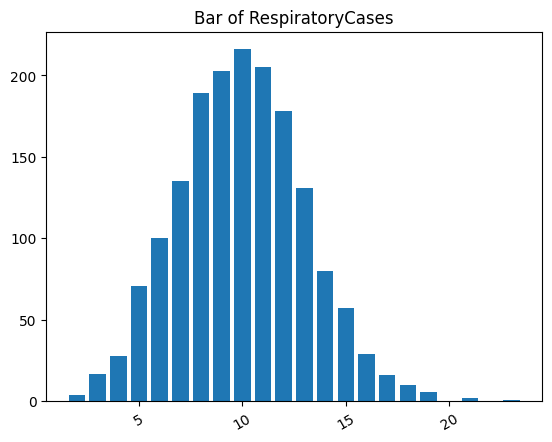

In [94]:
def show_plot_bar(col):
    categories = air_quality[col].value_counts()
    plt.bar(categories.index, categories.values)
    plt.title("Bar of " + col)
    plt.xticks(rotation=30)
    plt.show()

categoric_vars = ["CardiovascularCases","HospitalAdmissions",	"RespiratoryCases"]


for var in categoric_vars:
    show_plot_bar(var)

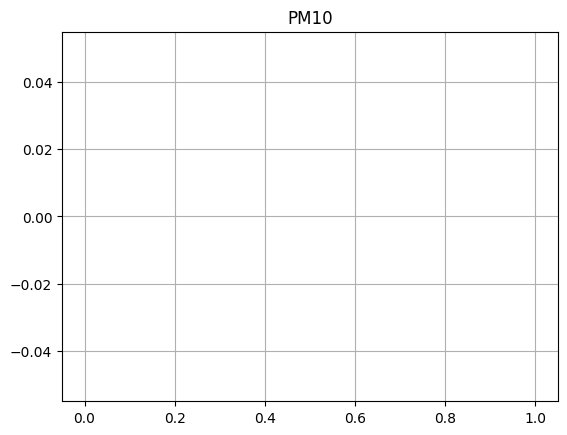

In [98]:
air_quality.hist("PM10")
plt.show()

In [106]:
#Expor dataset preprocessed
print(df_cleaned)
df_cleaned.to_csv('air_quality_preprocessed', index=False)

           AQI      PM10     PM2_5       NO2       SO2        O3  Temperature  \
3     0.598413  0.069244  0.071218  0.406263  0.483342  0.310616     0.980609   
4     0.154859  0.055789  0.760590  0.606393  0.909055  0.806215     0.100416   
9     0.708059  0.843349  0.910828  0.896809  0.445323  0.393305     0.122576   
18    0.431349  0.534722  0.986297  0.156713  0.462031  0.002167     0.807479   
21    0.138305  0.816440  0.727332  0.318577  0.118059  0.117798     0.851801   
...        ...       ...       ...       ...       ...       ...          ...   
5800  0.298555  0.238448  0.295474  0.370148  0.107754  0.361330     0.042244   
5801  0.098884  0.205896  0.975894  0.804172  0.206803  0.667078     0.583102   
5804  0.377618  0.786091  0.147537  0.721539  0.625613  0.510970     0.709141   
5805  0.087099  0.320947  0.026207  0.433473  0.039520  0.944152     0.292936   
5810  0.165401  0.273571  0.599850  0.967537  0.798799  0.095626     0.725069   

      Humidity  WindSpeed  